<a href="https://colab.research.google.com/github/ella00100/DeepLearning/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **시계열 분석**

- 시계열 분석이란 시간에 따라 변하는 데이터를 사용하여 **추이를 분석**하는 것!


**▶시계열 형태**
- 불규칙 변동(irregular variation) : 규칙성이 없어 예측 불가능, 우연적으로 발생하는 변동 
- 추세 변동(trend variation) : 장기적인 변화추세(증가/감소/유지)를 갖는 변동
- 순환 변동(cyclical variation) : 2~3년 정도의 일정 기간을 주기적으로 순환하는 변동
- 계절 변동(seasonal variation) : 계절/사회적 관습에 따라 1년 주기로 발생하는 변동

**▶시계열 데이터 분류**
- 규칙적 시계열: **트렌드와 분산이 불변**하는 데이터
- 불규칙적 시계열 : 트렌드 혹은 분산이 변하는 데이터


=> 시계열 데이터를 잘 분석한다는 것을 불규칙적 시계열에 특정한 기법/모델을 적용하여 규칙적 패턴을 찾거나 예측하는 것

## **불규칙적 시계열 데이터에 규칙성을 부여하는 방법**

##1.AR 모델(AutoRegressive, 자기회귀)
- 현재 시점의 데이터가, 이전 데이터(p시점 전까지)에 영향을 받는 모형


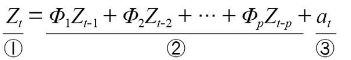

-  현재 시점의 값은 과거 시점의 값들에 가중치를 곱한 합으로 나타낼 수 있음
- AR 모델은 일반적으로 시계열 데이터가 정상성(Stationary)을 가정할 때 사용
- 정상성은 시계열 데이터의 평균과 분산이 일정하게 유지되는 것

##2.MA 모델(Moving Average, 이동 평균) 
- 트렌드가 변화하는 상황에 적합
- 현재 시점의 데이터가, 이전 데이터의 오차에 영향을 받는 모형

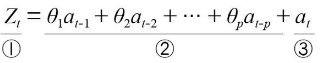

- 현재 시점의 값은 과거 시점의 오차항들에 가중치를 곱한 합으로 나타낼 수 있음
- 시계열 데이터가 정상성(Stationary)을 가정할 때 사용

##3.ARMA 모델(AutoRegressive Moving Average, 자기 회귀 이동 평균)

- AR, MA 두 가지 관점에서 과거의 데이터를 사용하는 것

image.png

- 이전 시점의 값들과 이전 오차항들 모두를 고려하여 현재 값을 예측
- 시계열 데이터가 정상성(Stationary)을 가정할 때 사용

##4. ARIMA모델 (AutoRegressiveIntegrated Moving Average, 자기 회귀 누적 이동 평균)
- AR(AutoRegressive) 모델과 MA(Moving Average) 모델, 그리고 I(Integrated) 모델의 합성 모델
- 과거 데이터의 선형 관계뿐만아니라 추세까지 고려
- 시계열 데이터의 **비정상성**(Non-Stationary)을 고려한 모델


- ARIMA(p, d, q) 
  - y(t) - y(t-1) = c + Σ(φ_i * (y(t-i) - y(t-i-1))) + Σ(θ_i * e(t-i))
  - y(t)는 현재 시점의 값, c는 상수항, φ_i는 i번째 이전 시점의 가중치, θ_i는 i번째 이전 시점의 오차항의 가중치, d는 시계열 데이터의 차분 차수를 의미

- ARIMA 모델 구현 절차
- ARIMA(p,d,q) 
  - p : 자기 회귀 차수
  - d : 차분 차수
  - q : 이동 평균 차수
- fit()메서드로 호출, 모델에 데이터 적용하여훈련
- predict() 미래의 추세 및 동향 예측

In [1]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot


<ipython-input-2-693c586d7409>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')


In [8]:
from google.colab import files
uploaded = files.upload()

Saving sales.csv to sales.csv


In [9]:
series = read_csv("sales.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)

<ipython-input-9-71a90cdb633e>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("sales.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)


In [12]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order = (5,1,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
model_fit = model.fit()

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Thu, 11 May 2023   AIC                            411.302
Time:                        11:36:52   BIC                            420.634
Sample:                             0   HQIC                           414.523
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


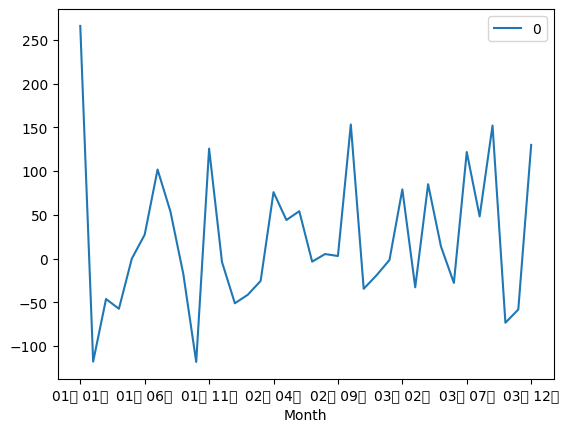

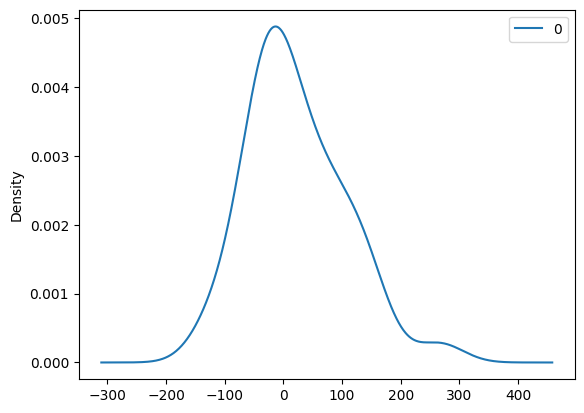

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [19]:
#오차정보
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind = 'kde')
pyplot.show()
print(residuals.describe())

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [23]:
X = series.values
X = np.nan_to_num(X)
size = int(len(X)*0.66)

In [25]:
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070405, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916190, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


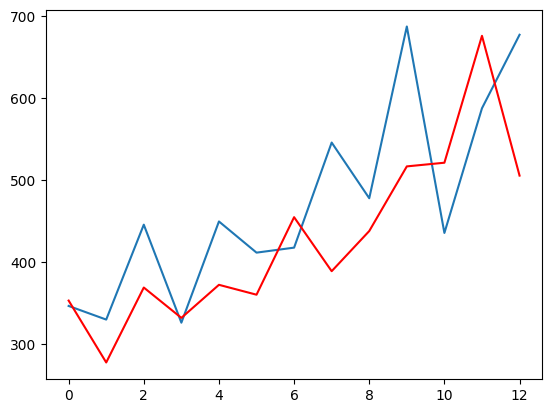

In [27]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' %error)
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()

#순환신경만 (RNN)
- RNN은 시간적으로 연속성이 있는 데이터를 처리하기 위해 고안된인공신경망
- 이전 은닉층이 현재 은닉층의  입력이 되며 반복되는 순환구조를 가짐
- 기억(memory)를 가짐
- 기존의 기업과 새로 들어온 기억으로 계속해서 새로운 기억은 만듬
- 최종적으로 남겨진 기억은 모든 입력 전체를 요약한 정보가 됨

In [28]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [31]:
torch.__version__

'2.0.0+cu118'